In [0]:
from imgaug import augmenters as iaa

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    #iaa.GaussianBlur(sigma=(0, 6.0)), # blur images with a sigma of 0 to 3.0
    #iaa.LinearContrast((0.75, 1.5)),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
])

In [0]:
batch=img1.reshape(1,*img1.shape)
batch.shape

(1, 768, 1024, 3)

In [0]:
for i in range(10):
  plt.imshow(seq(images=batch).reshape(img1.shape))
  plt.show()

In [6]:
!wget https://www.dropbox.com/sh/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa?dl=0

--2020-05-04 16:32:55--  https://www.dropbox.com/sh/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa [following]
--2020-05-04 16:32:55--  https://www.dropbox.com/sh/raw/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0ff6821a542330e902581bd63.dl.dropboxusercontent.com/zip_download_get/AacEzJJHFbd22L5suuLRKZWu7SXC5Y8mSaSIRhIe_ndNkQL4VKe8pwrwzZuiaVp4KekNbDlHzehgdqraJzLnIFxGQUe1XRcxRujjINkmEs_POA [following]
--2020-05-04 16:32:57--  https://ucd0ff6821a542330e902581bd63.dl.dropboxusercontent.com/zip_download_get/AacEzJJHFbd22L5suuLRKZWu7SXC5Y8mSaSIRhIe_ndNkQL4VKe8pwrwzZuiaVp4KekNbDlHzehgdqraJzLn

In [7]:
!ls

'AAAtm7aIwSZY78scu6e222NGa?dl=0'   sample_data


In [0]:
!mv AAAtm7aIwSZY78scu6e222NGa?dl=0 Pokemon.zip

In [0]:
! unzip Pokemon.zip

In [0]:
import os


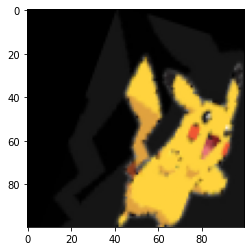

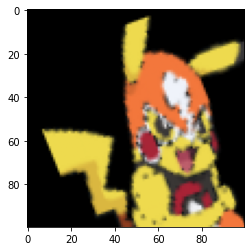

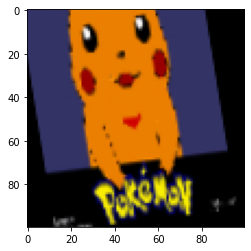

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


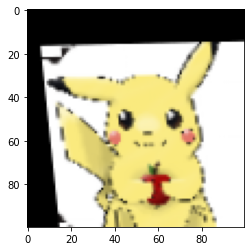

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


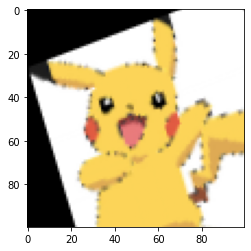

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


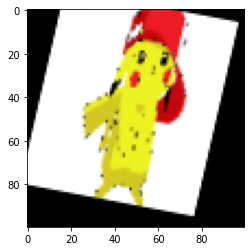

In [11]:
import os
Trainpath='Train/Pikachu'
for cnt,f in enumerate(os.listdir(Trainpath)):
  img = image.load_img(os.path.join(Trainpath,f),target_size=(100,100))
  img = image.img_to_array(img)
  img =(seq(images=img.reshape((1,*img.shape)))).reshape(img.shape)
  plt.imshow(img/255)
  plt.show()
  if cnt==5:
    break

In [0]:
from keras.models import Sequential
from keras.layers import *

In [0]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation="relu"))
model.add(Dense(3 ,activation="softmax"))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)               

In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [17]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=.2,
                                 horizontal_flip=True)
train=train_datagen.flow_from_directory('Train',batch_size=32,target_size=(100,100),class_mode='categorical',shuffle=True)

val_datagen=ImageDataGenerator(rescale=1/255)
val=val_datagen.flow_from_directory('Val',batch_size=32,target_size=(100,100),class_mode='categorical',shuffle=True)


Found 304 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


(32, 100, 100, 3) (32, 3)


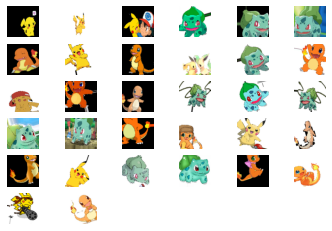

(32, 100, 100, 3) (32, 3)


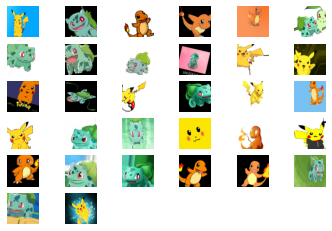

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(32, 100, 100, 3) (32, 3)


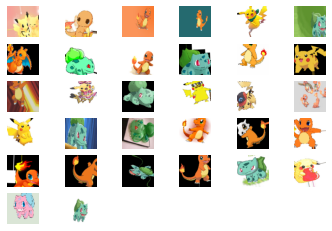

(32, 100, 100, 3) (32, 3)


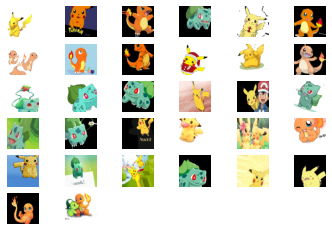

In [18]:
for count,(x,y) in enumerate(train):
  print(x.shape,y.shape)

  for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(x[i])
    plt.axis("off")  
  
  plt.show()
  
  if count==3:
    break

In [19]:
train.class_indices,val.class_indices


({'Bulbasaur': 0, 'Charmender': 1, 'Pikachu': 2},
 {'Bulbasaur': 0, 'Charmender': 1, 'Pikachu': 2})

In [20]:
dict([(ix[1],ix[0]) for ix in (train.class_indices).items()])

{0: 'Bulbasaur', 1: 'Charmender', 2: 'Pikachu'}

In [22]:
hist = model.fit_generator(train,epochs=25,steps_per_epoch=10,validation_data=val,validation_steps=4)

Epoch 1/25
 5/10 [==============>...............] - ETA: 6s - loss: 0.2247 - accuracy: 0.9438

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 9s 940ms/step - loss: 0.2060 - accuracy: 0.9342 - val_loss: 0.3142 - val_accuracy: 0.8943
Epoch 2/25
10/10 [==============================] - 9s 937ms/step - loss: 0.2377 - accuracy: 0.9112 - val_loss: 0.0965 - val_accuracy: 0.9431
Epoch 3/25
10/10 [==============================] - 9s 947ms/step - loss: 0.2062 - accuracy: 0.9408 - val_loss: 0.4131 - val_accuracy: 0.9512
Epoch 4/25
10/10 [==============================] - 9s 945ms/step - loss: 0.1941 - accuracy: 0.9605 - val_loss: 0.1050 - val_accuracy: 0.9350
Epoch 5/25
10/10 [==============================] - 10s 954ms/step - loss: 0.1799 - accuracy: 0.9572 - val_loss: 0.1176 - val_accuracy: 0.9350
Epoch 6/25
10/10 [==============================] - 9s 942ms/step - loss: 0.2030 - accuracy: 0.9178 - val_loss: 0.1083 - val_accuracy: 0.9268
Epoch 7/25
10/10 [==============================] - 9s 934ms/step - loss: 0.2326 - accuracy: 0.9342 - val_loss: 0.2897 - val_accuracy: 0.9512
Epoch 8/25
10/10